# Introduction to Application Programming Interfaces (APIs) in Python

## Making API requests with Python

This chapter introduces Web APIs, showing you how to make your first API requests with the requests Python package. You’ll learn about the key components of an API request, HTTP verbs, and how to build URLs and send & receive data. We’ll also cover headers and status codes, using a music catalog API for practical examples. By the end of this chapter you'll be able to confidently integrate a simple REST API with Python.

### What is an API?

- Application Programming Interface
- Set of communication rules and abilities for two systems to communicate with each other.
- Enables interactions between software applications to exchange or manipulate data.

#### Web APIs, clients and servers

- Web APIs are used to enable communication between two software applications over a network or internet
- Web APIs communicate over the internet using HTTP protocol
- Client sends a request message to a Server
- Server returns a response message to the Client
- request/response cycle

#### Tpes of Web APIs

- **SOAP**
    - Focus on strict and formal API design
    - Normally used in enterprise applications where robustness and strict protocols are required.
- **REST** 
    - Focus on simplicity & scalability, known for ease of integration
    - Most common API architecture
- **GraphQL**
    - Focus on precise and flexible data retrieval, minimizing data transfer
    - Optimized for performance

#### Working with APIs in Python 

**Two well-known Python libraries for integrating Web APIs**
- urllib
- requests

1. **urllib**
- comes bundled with Python
- Powerful but not very developer-friendly

```python
from urllib.request import urlopen
api = "http://api.music-catalog.com/"

with urlopen(api) as response:
    data = response.read()
    string = data.decode()
    print(string) 
```
- Here, we are making a request to the music catalog Web API to get a list of music albums
- To print the data we requested, we first need to use the urlopen function to send a request,
- then use the "read()" function on the response object to get the response data. 
- After that, we call the "decode()" function on the response data to extract the raw data, and then we can finally print the data we received from the API.

2. **requests**
- Many powerful built-in features which urllib needs additional steps or packages for
- easier to use

```python
import requests
api = "http://api.music-catalog.com/"

response = requests.get(api)
print(response.text)
```
- requests takes care of reading and decoding the response
- all we need to do is print the text attribute of the response object

##### 1. API requests with urllib
For this course, you will be using the API for a Music Catalog application. This API has multiple features. You will start with the Lyrics API, which allows you to retrieve a quote from the Lyric of the day.

Before you can make your first API request, you will need to know where the API can be accessed. This location is also referred to as the URL, short for Uniform Resource Locator. The URL will tell Python where to send the API request to. The URL for the Lyrics API is as follows: `http://localhost:3000/lyrics/`.

Let's make a first request to the Lyrics API using the built-in urllib Python module.

- Use the read function on the response object to read the response data from the response object.
- Use the decode function to decode the response data into a string with the right encoding.

```python
from urllib.request import urlopen

with urlopen('http://localhost:3000/lyrics/') as response:
  
  # Use the correct function to read the response data from the response object
  data = response.read()
  encoding = response.headers.get_content_charset()

  # Decode the response data so you can print it as a string later
  string = data.decode(encoding)
  
  print(string)
  ```

##### 2. Using the requests package
Using urllib to integrate APIs can result in verbose and complex code as you need to take care of a lot of additional things like encoding and decoding responses.

As an alternative to urllib, the requests Python package offers a simpler way to integrate APIs. A lot of functionality is available out of the box with requests, which makes your code a lot easier to write and read. Let's try the same exercise again but now with the requests package.

Remember, as with the previous exercise, the URL for the Lyrics API is `http://localhost:3000/lyrics`.

- Import the requests package.
- Pass the URL `http://localhost:3000/lyrics` to the requests.get method.
- Print out the response text.

```python
# Import the requests package
import requests

# Pass the API URL to the get function
response = requests.get("http://localhost:3000/lyrics")

# Print out the text attribute of the response object
print(response.text)
```

### The basic anatomy of an API request

#### What are URLs? 
- URL = Uniform Resource Locator
- the structured address pointing to an API resources
- we can customize the URL to interact with specific API resources 

`http://350.5th-ave.com/unit/243`
- for this example, we will compare a REST API to an office buildinf
- each office unit is a unique resource. 
- The URL is the address of a single unit in the building, it contains all the information needed to navigate to that specific unit.

#### Diseccting the URL

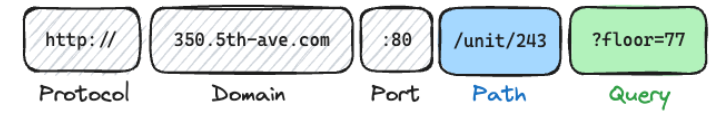

- **Protocol** = the means of transportation
- **Domain** = the street address of the office building (uniquely identifies the location of the API server on the internet)
- **Port** = the gate or door to use when entering the building
- **Path** = the specific office unit inside the building.With APIs, each resource has a unique location on the server, defined by its path
- **Query** = any additional instructions

#### Adding query parameters with requests

```python 
# append the qeury parameter to the URL string
response = requests.get('http://350.5th-ave.com/unit/243?floor=77&elevator=True')
print(response.url)
```
- Adding a query parameter using the requests package is very easy. 
- We might want to just append the query parameter to the URL string, which works fine, but there is a better way. 

**Use the `params` argument to add qeury parameters**
```python
# Create dictionary
query_params = {'floor': 77, 'elevator': True}

# Pass the dictionary using the 'params' argument
response = requests.get('http://350.5th-ave.com/unit/243',params = query_params)
print(response.url)
```
- Each HTTP method from the requests package, such as `get`, accepts an additional argument called `params` which accepts a dictionary with key/value pairs, one for each query parameter.

#### HTTP Verbs

Let's send a package to the DataCamp office! Using the URL, we have constructed the destination of our package: the mailbox of unit 243 in the Empire State building. But how do we now define what to do with the package when we arrive at our destination? 

- Destination: Unit 243 of the 350 5th Ave office building 
- URL: http://350.5th-ave.com/unit/243

**This is where HTTP verbs come in**
- Every request uses one of 9 HTTP verbs

|verb | Action | Description               | 
|-----|--------|---------------------------|
|GET  |Read the resource| Check the mailbox contents|
|POST |Create the resource| Drop a new package in the mailbox|
|PUT  |Update the resource| Replace all packages with a new one|
|DELETE  |Delete the resource| Remove all packages from the mailbox|

#### Sending data cia POST and PUT

```python 
# GET = Retrieve a resource
response = requests.get('http://350.5th-ave.com/unit/243')
# POST = create a resource
response = requests.post('http://350.5th-ave.com/unit/243', data = {"key":"value"})
# PUT = Update an existing resource
response = requests.put('http://350.5th-ave.com/unit/243', data = {"key":"value"})
# DELETE = Remove a resource
response = requests.delete('http://350.5th-ave.com/unit/243')
```
- each verb has it's own method in the requests package
- Use the `data` argument to pass data to a POST or PUT request


##### 1. The 4 most important HTTP Verbs

HTTP verbs are a fundamental concept in REST APIs. There are 9 verbs in total, you got to know the four most important ones used by REST APIs: GET, POST, PUT and DELETE.

Previously you learned how you can perform actions on API resources using these HTTP verbs. Each verb is associated with a specific type of action. Do you know what action belongs to what verb?

Note: For the purpose of this exercise we only use the three most common verbs: GET, POST and DELETE.

- Drag and drop each item into the correct HTTP Verb bucket based on the type of action that is being performed.

##### 2. Constructing a URL with parameters
You can fine-tune your API requests using the path and query parameters of the URL. Let's learn how you can use HTTP verbs, URL paths, and parameters using the requests package.

In this exercise, you will make another API request to the Lyrics API, but instead of getting today's lyric, you will send a request to the random lyrics API. You will then further customize the API request by adding query parameters to filter on specific artists and include the track title. Below, you can find the details needed to construct the correct URL.

|Component	|Value|
|----------|--------|
|Protocol	|http|
|Domain	|localhost|
|Port	|3000|
|Path	|/lyrics/random|
|Artist filter parameter	|artist|
|Include track parameter|	include_track|

The requests library is already imported for your convenience.
- Construct the URL to the random lyrics API for the `requests.get()` method using the protocol, domain, port and path components.

```python 
# Construct the URL string and pass it to the requests.get() function
response = requests.get('http://localhost:3000/lyrics/random')

print(response.text)
```

Let's now add a query parameter to only get lyrics by a specific artist.

- Create a dictionary variable with one entry: the key artist with a value of Deep Purple.
- Pass this dictionary to the requests.get() method as the params argument.

```python 
# Create a dictionary variable with query params
query_params = {"artist":"Deep Purple"}

# Pass the dictionary to the get() function
response = requests.get('http://localhost:3000/lyrics/random', params=query_params)

print(response.text)
```

- Add a second item to the dictionary with the key include_track and the Boolean value True.
- Print the response's url attribute to see the full URL.
- Print out the lyric.

```python 
# Add the `include_track` parameter
query_params = {'artist': 'Deep Purple', 'include_track' : True}

response = requests.get('http://localhost:3000/lyrics/random', params=query_params)

# Print the response URL
print(response.url)

# Print the lyric
print(response.text)
```

##### 3. Creating and deleting resources using an API
Now that you have learned how to construct a URL, you can send requests to specific API resources. Let's see what more you can do with HTTP verbs on these resources.

In this exercise, you will use the playlists API available via http://localhost:3000/playlists/. This API offers the following actions:

|Verb|	Path|	Description|
|----|------|--------------|
|GET|	playlists|	get a list of all playlists|
|GET|	/playlists/{PlaylistId}|	get information on a single playlist using it's unique identifier PlaylistId|
|POST|	/playlists|	create a new playlist|
|DELETE|	/playlists/{PlaylistId}|	remove an existing playlist using it's unique identifier PlaylistId|

You will start by getting a list of all existing playlists, then you will learn how to create a new playlist and verify it's creation, and last you will learn how to remove an existing playlist.

The `requests` library is already imported for your convenience.
1. Get a list of all playlists from the playlists API.

```python 
# Get a list of all playlists from the API
response = requests.get('http://localhost:3000/playlists')
print(response.text)
```

2. Create a dictionary with Name set to Rock Ballads, then perform a POST request with this dictionary as the data parameter.

```python 
# Create a dictionary with the playlist info
playlist_data = {'Name': "Rock Ballads"}

# Perform a POST request to the playlists API with your dictionary as data parameter
response = requests.post('http://localhost:3000/playlists', data=playlist_data)
print(response.text)
```

3. Perform a GET request to get information on the playlist with PlaylistId 2.

```python 
# Perform a GET request to get info on playlist with PlaylistId 2
response = requests.get('http://localhost:3000/playlists/2')

print(response.text)
```

4. Send a DELETE request to the URL for the playlist with PlaylistId 2 and get the list of existing playlists to confirm removal.

```python 
# Perform a DELETE request to the playlist API using the path to playlist with PlaylistId 2
requests.delete('http://localhost:3000/playlists/2')

# Get the list of all existing playlists again
response = requests.get('http://localhost:3000/playlists')
print(response.text)
```

### Headers and status codes
So far, we have only sent a request message to a server and processed the response. But what if we want to give the server extra instructions? Or check that the server properly handled our request? That is where headers and status-codes come in.

#### Request and response message anatomy

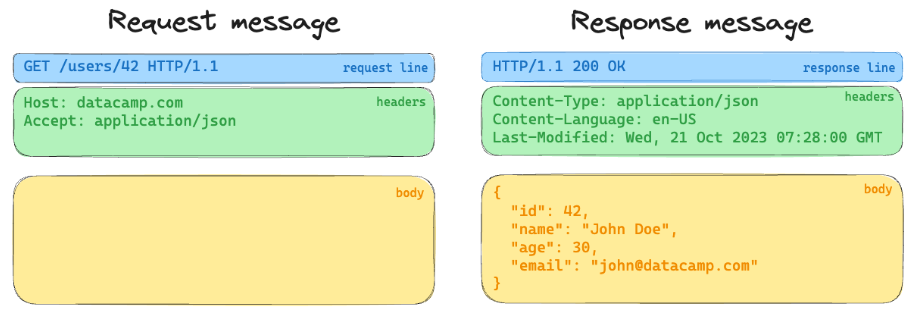

So far, we have only sent a request message to a server and processed the response. But what if we want to give the server extra instructions? Or check that the server properly handled our request? That is where headers and status-codes come in.

#### 1. **The start line**
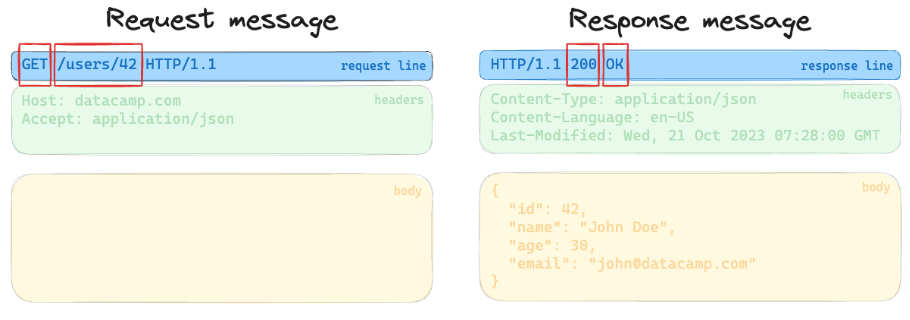

- In request messages, this is referred to as the request-line. It contains the request type such as 'GET' or 'POST', along with the path where the message should be delivered to
- In response messages, the start line is called the status-line and contains a three-digit numerical status-code and a status message.
- A server will always include a numeric status code in the response message

#### 2. **Status codes**

There are over 70 status codes in total, grouped into 5 categories

**Status code categories**
- `1XX` : Informational responses
- `2XX` : Successful responses
- `3XX` : Redirection messages
- `4XX` : Client error responses
- `5XX` : Server error responses

**Frequently used status codes**
- '200 OK' : indicates the server has correctly processed the request
- '404 Not Found' : indicate that the resource we are requesting doesn't exist
- '500 Internal Server Error' : means an error occurred on the server.

#### 3. **Headers**
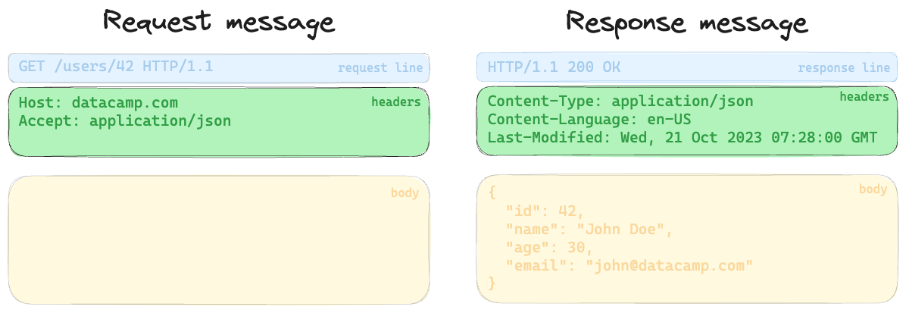
 
- Headers contain information that describe the message or data being sent or received, such as the type of content we are sending or the date the requested resource was last modified.
- Headers are always formatted as key-value pairs separated by a colon.
```
key1: Value 1
key2: Value 2
```
- Each header starts with a case-insensitive key, followed by a colon, and then the value of that header.

**Example : Content negotiation with headers**

In order to effectively communicate, client and server use message headers to agree on the language they are using to exchange information. This is called content negotiation.

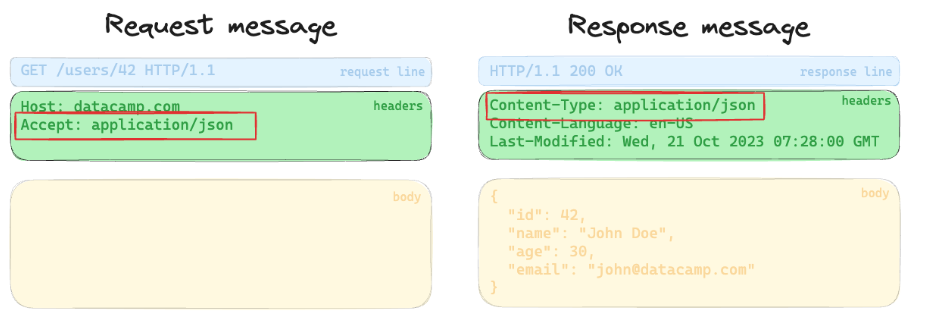

- Client adds an `accept: application/json` header to the request (sends the 'accept' header to inform the server it can accept a response in JSON format)
- Server responds with a `content-type: application/json` header (it includes the content-type header to let the client know what format it responded with)

#### 4. **Headers with requests**

```python
# Adding headers to a request
response = requests.get(
    'https://api.datacamp.com',
    headers = {'accept':'application/json'}
)
```
- The Python requests package allows us to add and read headers. 
- Each request method like requests.get or requests.post accepts an additional headers parameter with key-value pairs in the form of a dictionary.
- The response object has a headers attribute, which is a dictionary containing one key-value pair for every header received back in the response.

```python 
# Reading response headers
response.headers['content-type']
```
output : `'application/json'`

```python 
response.headers.get('content-type')
```
output : `'application/json'`
- We can access individual response headers bu subsetting the dictionary using square brackets, or by using the `.get()` method on the dictionary

#### 5. Status codes with requests

```python 
# Accessing the status code
response = requests.get('https://api.datacamp.com/users/12')
response.status_code == 200
```
output : `True`

- Similar to working with headers, the requests package also simplifies how we get the status-code from a response. 
- Each response object has a status-code attribute which contains the numeric value of the status-code. 

```python 
# Looking up status codes using requests.codes
response = requests.get('https://api.datacamp.com/this/is/the/wrong/path')
response.status_code == requests.codes.not_found
```
output : `True`

- By chaining the status-message to the requests.codes lookup object we can easily find any status code, without the need to know the code. 
- Like here where we use the lookup object to find the status-code for Not Found.

##### 1. Response codes and APIs
When a client sends a request to a server, the server response includes a numeric status code, which is used to tell the client how the server responded to the request.

In this exercise you will learn about the most important status codes you should know. We will send requests to valid and invalid paths and learn how we can access the status code to determine if our request was successful or not.

The requests package comes with a built-in status code lookup object requests.codes you can use when you don't remember the exact numerical values.

The requests package has been imported for you.

1. Check if the server responded successfully with the 200 status code.
2. Perform a request to the inexistent /movies path of the music catalog API.
Check if the server responded with a status code indicating the resource was not found, providing the appropriate numerical status code representing this.
3. Check for response codes with a 200 OK and 404 Not found status code using the requests.codes lookup object.